<a href="https://colab.research.google.com/github/aai510-group1/project/blob/main/project_paul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from xgboost import XGBClassifier


# Load Dataset

In [88]:
# Load the Telco dataset
df = pd.read_csv('./Dataset/dataset.csv')
# drop customer id and location data

df.drop([
    'Customer ID',
    'Lat Long', 
    'Country', 
    'State', 
    'City', 
    'Zip Code', 
    ], axis=1, inplace=True)

# EDA

In [89]:
# Display the first 5 rows of the dataframe
print(df.head())

   Age  Avg Monthly GB Download  Avg Monthly Long Distance Charges  \
0   78                        8                               0.00   
1   39                       18                              42.55   
2   32                       26                               7.11   
3   35                       25                               0.00   
4   20                       42                              36.49   

  Churn Category Churn Label                  Churn Reason  Churn Score  \
0     Competitor         Yes  Competitor offered more data           91   
1            NaN          No                           NaN           42   
2            NaN          No                           NaN           34   
3            NaN          No                           NaN           46   
4            NaN          No                           NaN           38   

   Churn Value  CLTV        Contract  ... Streaming Music Streaming TV  \
0            1  5433  Month-to-Month  ...             

In [90]:
# Display the summary statistics of the dataframe
print(df.describe())

               Age  Avg Monthly GB Download  \
count  7043.000000              7043.000000   
mean     46.509726                20.515405   
std      16.750352                20.418940   
min      19.000000                 0.000000   
25%      32.000000                 3.000000   
50%      46.000000                17.000000   
75%      60.000000                27.000000   
max      80.000000                85.000000   

       Avg Monthly Long Distance Charges  Churn Score  Churn Value  \
count                        7043.000000  7043.000000  7043.000000   
mean                           22.958954    58.505040     0.265370   
std                            15.448113    21.170031     0.441561   
min                             0.000000     5.000000     0.000000   
25%                             9.210000    40.000000     0.000000   
50%                            22.890000    61.000000     0.000000   
75%                            36.395000    75.500000     1.000000   
max             

In [91]:
# Display the information of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                7043 non-null   int64  
 1   Avg Monthly GB Download            7043 non-null   int64  
 2   Avg Monthly Long Distance Charges  7043 non-null   float64
 3   Churn Category                     1869 non-null   object 
 4   Churn Label                        7043 non-null   object 
 5   Churn Reason                       1869 non-null   object 
 6   Churn Score                        7043 non-null   int64  
 7   Churn Value                        7043 non-null   int64  
 8   CLTV                               7043 non-null   int64  
 9   Contract                           7043 non-null   object 
 10  Customer Status                    7043 non-null   object 
 11  Dependents                         7043 non-null   objec

In [92]:
# Check for missing values
print(df.isnull().sum())

Age                                     0
Avg Monthly GB Download                 0
Avg Monthly Long Distance Charges       0
Churn Category                       5174
Churn Label                             0
Churn Reason                         5174
Churn Score                             0
Churn Value                             0
CLTV                                    0
Contract                                0
Customer Status                         0
Dependents                              0
Device Protection Plan                  0
Gender                                  0
Internet Service                        0
Internet Type                        1526
Latitude                                0
Longitude                               0
Married                                 0
Monthly Charge                          0
Multiple Lines                          0
Number of Dependents                    0
Number of Referrals                     0
Offer                             

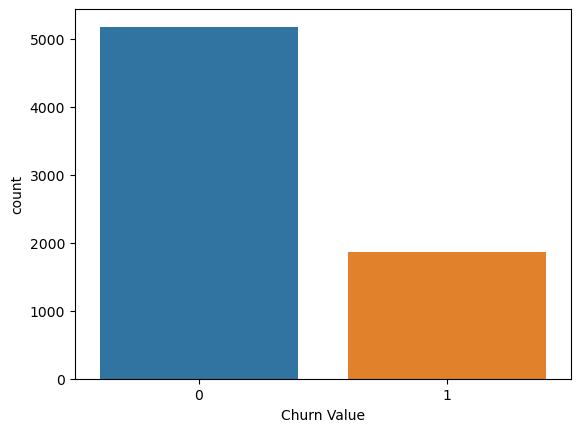

In [93]:
sns.countplot(x='Churn Value', data=df)
plt.show()

/Users/pparks/anaconda3/envs/msaai-1/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


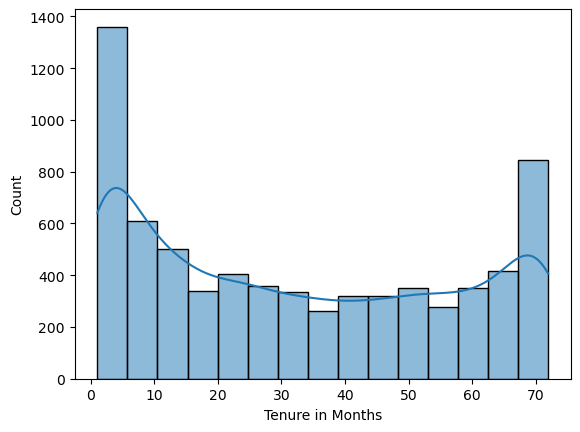

In [94]:
sns.histplot(df['Tenure in Months'], kde=True)
plt.show()

/Users/pparks/anaconda3/envs/msaai-1/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


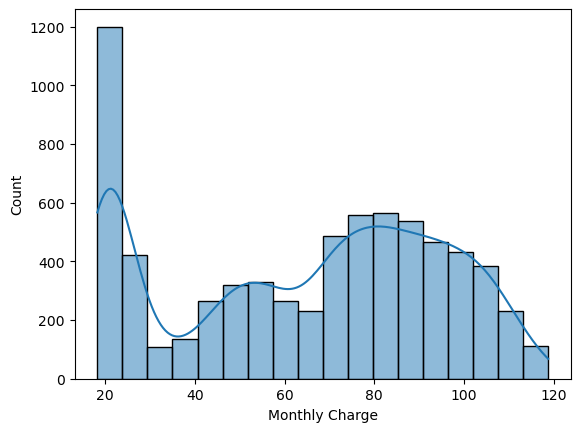

In [95]:
sns.histplot(df['Monthly Charge'], kde=True)
plt.show()

# Cleaning

In [96]:
# find all columns that contain 2 values that are strings
binary_columns = [col for col in df.columns if df[col].nunique() == 2]
# drop Churn Value column
binary_columns.remove('Churn Value')
binary_columns.remove('Churn Label')

print(binary_columns)

for column in binary_columns:
    # check if column is string
    if df[column].dtype != 'object':
        binary_columns.remove(column)
    print(f'{column}: {df[column].unique()}')

['Dependents', 'Device Protection Plan', 'Gender', 'Internet Service', 'Married', 'Multiple Lines', 'Online Backup', 'Online Security', 'Paperless Billing', 'Partner', 'Phone Service', 'Premium Tech Support', 'Referred a Friend', 'Senior Citizen', 'Streaming Movies', 'Streaming Music', 'Streaming TV', 'Under 30', 'Unlimited Data']
Dependents: ['No' 'Yes']
Device Protection Plan: ['Yes' 'No']
Gender: ['Male' 'Female']
Internet Service: ['Yes' 'No']
Married: ['No' 'Yes']
Multiple Lines: ['No' 'Yes']
Online Backup: ['No' 'Yes']
Online Security: ['No' 'Yes']
Paperless Billing: ['Yes' 'No']
Partner: ['No' 'Yes']
Phone Service: ['No' 'Yes']
Premium Tech Support: ['No' 'Yes']
Referred a Friend: ['No' 'Yes']
Senior Citizen: ['Yes' 'No']
Streaming Movies: ['Yes' 'No']
Streaming Music: ['No' 'Yes']
Streaming TV: ['No' 'Yes']
Under 30: ['No' 'Yes']
Unlimited Data: ['No' 'Yes']


In [97]:
# Convert boolean columns to 1/0, except for columns with three values
# boolean_columns = [
#     'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
#     'Paperless Billing', 'Churn Label',
#     'Multiple Lines', 'Online Security', 'Online Backup',
#     'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies'
# ]
boolean_columns = binary_columns

# double check that these columns only have two values
for column in boolean_columns:
    print(f'{column}: {df[column].unique()}')

for column in boolean_columns:
    df[column] = df[column].apply(lambda x: 1 if x == 'Yes' else 0)

for column in boolean_columns:
    print(f'{column}: {df[column].unique()}')

Dependents: ['No' 'Yes']
Device Protection Plan: ['Yes' 'No']
Gender: ['Male' 'Female']
Internet Service: ['Yes' 'No']
Married: ['No' 'Yes']
Multiple Lines: ['No' 'Yes']
Online Backup: ['No' 'Yes']
Online Security: ['No' 'Yes']
Paperless Billing: ['Yes' 'No']
Partner: ['No' 'Yes']
Phone Service: ['No' 'Yes']
Premium Tech Support: ['No' 'Yes']
Referred a Friend: ['No' 'Yes']
Senior Citizen: ['Yes' 'No']
Streaming Movies: ['Yes' 'No']
Streaming Music: ['No' 'Yes']
Streaming TV: ['No' 'Yes']
Under 30: ['No' 'Yes']
Unlimited Data: ['No' 'Yes']
Dependents: [0 1]
Device Protection Plan: [1 0]
Gender: [0]
Internet Service: [1 0]
Married: [0 1]
Multiple Lines: [0 1]
Online Backup: [0 1]
Online Security: [0 1]
Paperless Billing: [1 0]
Partner: [0 1]
Phone Service: [0 1]
Premium Tech Support: [0 1]
Referred a Friend: [0 1]
Senior Citizen: [1 0]
Streaming Movies: [1 0]
Streaming Music: [0 1]
Streaming TV: [0 1]
Under 30: [0 1]
Unlimited Data: [0 1]


In [98]:
# # Handle columns with three values
# three_value_columns = [
#     'Multiple Lines', 'Online Security', 'Online Backup',
#     'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies'
# ]

# # double check that these columns have three values
# for column in three_value_columns:
#     print(f'{column}: {df[column].unique()}')

# for column in three_value_columns:
#     df[column] = df[column].replace({
#         'Yes': 1,
#         'No': 0,
#         'No internet service': -1,
#         'No phone service': -1
#     })

# for column in three_value_columns:
#     print(f'{column}: {df[column].unique()}')

In [99]:
# Clean the 'Total Charges' column
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df['Total Charges'].describe()

count    7043.000000
mean     2280.381264
std      2266.220462
min        18.800000
25%       400.150000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: Total Charges, dtype: float64

In [100]:
numeric_columns = df.select_dtypes(include=[float, int]).columns

# first show the number of missing values in each column
print(df[numeric_columns].isnull().sum())

# since Total Charges has missing values, we will fill them with 0
df['Total Charges'] = df['Total Charges'].fillna(0)

Age                                  0
Avg Monthly GB Download              0
Avg Monthly Long Distance Charges    0
Churn Score                          0
Churn Value                          0
CLTV                                 0
Dependents                           0
Device Protection Plan               0
Gender                               0
Internet Service                     0
Latitude                             0
Longitude                            0
Married                              0
Monthly Charge                       0
Multiple Lines                       0
Number of Dependents                 0
Number of Referrals                  0
Online Backup                        0
Online Security                      0
Paperless Billing                    0
Partner                              0
Phone Service                        0
Population                           0
Premium Tech Support                 0
Referred a Friend                    0
Satisfaction Score       

In [101]:
# show call column types that are not numeric
print(df.select_dtypes(exclude=[float, int, bool]).columns)

Index(['Churn Category', 'Churn Label', 'Churn Reason', 'Contract',
       'Customer Status', 'Internet Type', 'Offer', 'Payment Method',
       'Quarter'],
      dtype='object')


In [102]:
# Encode categorical variables using get_dummies
categorical_columns = ['Contract', 'Payment Method', 'Internet Type', 'Offer', 'Quarter']
data_encoded_large = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [103]:
data_encoded_large.describe()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Score,Churn Value,CLTV,Dependents,Device Protection Plan,Gender,Internet Service,...,Streaming Music,Streaming TV,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.0,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,20.515405,22.958954,58.505040,0.265370,4400.295755,0.231010,0.343888,0.0,0.783331,...,0.353259,0.384353,32.386767,2280.381264,6.860713,749.099262,1.962182,3034.379056,0.198921,0.673719
std,16.750352,20.418940,15.448113,21.170031,0.441561,1183.057152,0.421508,0.475038,0.0,0.412004,...,0.478016,0.486477,24.542061,2266.220462,25.104978,846.660055,7.902614,2865.204542,0.399217,0.468885
min,19.000000,0.000000,0.000000,5.000000,0.000000,2003.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,1.000000,18.800000,0.000000,0.000000,0.000000,21.360000,0.000000,0.000000
25%,32.000000,3.000000,9.210000,40.000000,0.000000,3469.000000,0.000000,0.000000,0.0,1.000000,...,0.000000,0.000000,9.000000,400.150000,0.000000,70.545000,0.000000,605.610000,0.000000,0.000000
50%,46.000000,17.000000,22.890000,61.000000,0.000000,4527.000000,0.000000,0.000000,0.0,1.000000,...,0.000000,0.000000,29.000000,1394.550000,0.000000,401.440000,0.000000,2108.640000,0.000000,1.000000
75%,60.000000,27.000000,36.395000,75.500000,1.000000,5380.500000,0.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,55.000000,3786.600000,0.000000,1191.100000,0.000000,4801.145000,0.000000,1.000000
max,80.000000,85.000000,49.990000,96.000000,1.000000,6500.000000,1.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,72.000000,8684.800000,150.000000,3564.720000,49.790000,11979.340000,1.000000,1.000000


In [104]:
# show call column types that are not numeric
print(data_encoded_large.select_dtypes(exclude=[float, int, bool]).columns)

Index(['Churn Category', 'Churn Label', 'Churn Reason', 'Customer Status'], dtype='object')


In [105]:
# Define the feature matrix (X) and the target vector (y)
X = data_encoded_large.drop(columns=[
     'Churn Label', 
     'Churn Value',
     'Churn Score',
     'Customer Status',
     'CLTV',
     'Churn Reason',
     'Churn Category',
     'Satisfaction Score',
     ])
y = data_encoded_large['Churn Value']

In [106]:
# list all of the X feature types to verify that they are all numeric
print(X.dtypes)

Age                                    int64
Avg Monthly GB Download                int64
Avg Monthly Long Distance Charges    float64
Dependents                             int64
Device Protection Plan                 int64
Gender                                 int64
Internet Service                       int64
Latitude                             float64
Longitude                            float64
Married                                int64
Monthly Charge                       float64
Multiple Lines                         int64
Number of Dependents                   int64
Number of Referrals                    int64
Online Backup                          int64
Online Security                        int64
Paperless Billing                      int64
Partner                                int64
Phone Service                          int64
Population                             int64
Premium Tech Support                   int64
Referred a Friend                      int64
Senior Cit

In [107]:
# show values in y
print(y.value_counts())

Churn Value
0    5174
1    1869
Name: count, dtype: int64


In [108]:
# show columns in X
print(X.columns)

Index(['Age', 'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges',
       'Dependents', 'Device Protection Plan', 'Gender', 'Internet Service',
       'Latitude', 'Longitude', 'Married', 'Monthly Charge', 'Multiple Lines',
       'Number of Dependents', 'Number of Referrals', 'Online Backup',
       'Online Security', 'Paperless Billing', 'Partner', 'Phone Service',
       'Population', 'Premium Tech Support', 'Referred a Friend',
       'Senior Citizen', 'Streaming Movies', 'Streaming Music', 'Streaming TV',
       'Tenure in Months', 'Total Charges', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Refunds', 'Total Revenue',
       'Under 30', 'Unlimited Data', 'Contract_One Year', 'Contract_Two Year',
       'Payment Method_Credit Card', 'Payment Method_Mailed Check',
       'Internet Type_DSL', 'Internet Type_Fiber Optic', 'Offer_Offer B',
       'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E'],
      dtype='object')


# Baseline Model

In [109]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
def fit_predict_evaluate(model, X_train, y_train, X_test, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Predict the target vector
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
    print(f'Classification Report:\n{classification_report(y_test, y_pred)}')
    print(f'AUC: {roc_auc_score(y_test, y_pred)}')

## Logistic Regression

In [111]:
model = LogisticRegression(max_iter=1000)
fit_predict_evaluate(model, X_train, y_train, X_test, y_test)

Accuracy: 0.7955997161107168
Confusion Matrix:
[[920 112]
 [176 201]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1032
           1       0.64      0.53      0.58       377

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

AUC: 0.7123146834453972


/Users/pparks/anaconda3/envs/msaai-1/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## XGBoost

In [112]:
model = XGBClassifier()
fit_predict_evaluate(model, X_train, y_train, X_test, y_test)

Accuracy: 0.8481192334989354
Confusion Matrix:
[[937  95]
 [119 258]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1032
           1       0.73      0.68      0.71       377

    accuracy                           0.85      1409
   macro avg       0.81      0.80      0.80      1409
weighted avg       0.85      0.85      0.85      1409

AUC: 0.7961479345300516


In [113]:
# Try Random Forest
model = RandomForestClassifier()
fit_predict_evaluate(model, X_train, y_train, X_test, y_test)

Accuracy: 0.836763662171753
Confusion Matrix:
[[951  81]
 [149 228]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1032
           1       0.74      0.60      0.66       377

    accuracy                           0.84      1409
   macro avg       0.80      0.76      0.78      1409
weighted avg       0.83      0.84      0.83      1409

AUC: 0.7631430818579976


In [114]:
calculate_best_features = False

## XGBoost hyperparameter

In [115]:
from sklearn.model_selection import GridSearchCV
if (calculate_best_features):
    # Define the parameter grid
    param_grid = {
        'learning_rate': [0.1, 0.01, 0.001],
        'max_depth': [3, 5, 7, 10],
        'n_estimators': [100, 200, 500],
        # 'tree_method': ['gpu_hist']  # Use GPU accelerated algorithm
    }

    # Initialize the XGBoost classifier
    model = XGBClassifier()

    # Initialize the GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='f1_macro')

    # Fit the data to the GridSearchCV
    grid_search.fit(X_train, y_train)

    # Get the best parameters
    best_params = grid_search.best_params_

    print(f'Best parameters: {best_params}')
else: 
    # Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
    best_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

# Initialize the XGBoost classifier with the best parameters
model = XGBClassifier(**best_params)

fit_predict_evaluate(model, X_train, y_train, X_test, y_test)

Accuracy: 0.8552164655784245
Confusion Matrix:
[[946  86]
 [118 259]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1032
           1       0.75      0.69      0.72       377

    accuracy                           0.86      1409
   macro avg       0.82      0.80      0.81      1409
weighted avg       0.85      0.86      0.85      1409

AUC: 0.8018346595932803


## Random forest hyper parameter

In [116]:
if (calculate_best_features):
    # Define the parameter grid
    param_grid = {
        'n_estimators': [100, 200, 500, 1000],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [10, 20, 30, 40, 50, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }

    # Initialize the RandomForestClassifier
    model = RandomForestClassifier()

    # Initialize the GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='f1_macro', n_jobs=-1, verbose=2)

    # Fit the data to the GridSearchCV
    grid_search.fit(X_train, y_train)

    # Get the best parameters
    best_params = grid_search.best_params_

    print(f'Best parameters: {best_params}')
else:
    # Best parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
    best_params = {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}

# Initialize the RandomForestClassifier with the best parameters
model = RandomForestClassifier(**best_params)

fit_predict_evaluate(model, X_train, y_train, X_test, y_test)

Accuracy: 0.8452803406671399
Confusion Matrix:
[[959  73]
 [145 232]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1032
           1       0.76      0.62      0.68       377

    accuracy                           0.85      1409
   macro avg       0.81      0.77      0.79      1409
weighted avg       0.84      0.85      0.84      1409

AUC: 0.7723240906380442


# Best Model

Use Synthetic Minority Oversampling Technique to accound for imbalanced dataset

In [117]:
# Try smote
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

best_params = {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
model = RandomForestClassifier(**best_params)
fit_predict_evaluate(model, X_train_smote, y_train_smote, X_test, y_test)

Accuracy: 0.8147622427253371
Confusion Matrix:
[[866 166]
 [ 95 282]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1032
           1       0.63      0.75      0.68       377

    accuracy                           0.81      1409
   macro avg       0.77      0.79      0.78      1409
weighted avg       0.83      0.81      0.82      1409

AUC: 0.7935789484506405


# Deployment

The model.pkl file is a serialized version of the trained machine learning model. This file can be used for deployment in a production environment.

To use the model for prediction in a new environment, you first load it using joblib.load(). Once loaded, the model can be used to make predictions using the same feature set it was trained on.

In [118]:
# Save model to file
import joblib
joblib.dump(model, 'model.pkl')

# Load the model from the file
model_from_pkl = joblib.load('model.pkl')

# Predict the target vector
y_pred = model_from_pkl.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')
print(f'AUC: {roc_auc_score(y_test, y_pred)}')

Accuracy: 0.8147622427253371
Confusion Matrix:
[[866 166]
 [ 95 282]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1032
           1       0.63      0.75      0.68       377

    accuracy                           0.81      1409
   macro avg       0.77      0.79      0.78      1409
weighted avg       0.83      0.81      0.82      1409

AUC: 0.7935789484506405
